In [1]:
!pip uninstall pytorch_forecasting
!pip install pytorch_forecasting==0.10.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.4 MB/s eta 0:00:00
     ━━━━━━

In [2]:
!pip uninstall -y pytorch-lightning
!pip install pytorch-lightning==1.9.4

Found existing installation: pytorch-lightning 1.9.5
Uninstalling pytorch-lightning-1.9.5:
  Successfully uninstalled pytorch-lightning-1.9.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 kB 14.5 MB/s eta 0:00:00


In [3]:
!pip uninstall torchvision
!pip install torchvision>=0.8.2

Found existing installation: torchvision 0.15.2+cu118
Uninstalling torchvision-0.15.2+cu118:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/torchvision-0.15.2+cu118.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libcudart.60cfec8e.so.11.0
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libjpeg.ceea7512.so.62
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libnvjpeg.70530407.so.11
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libpng16.7f72a3c5.so.16
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libz.e3d3156c.so.1
    /usr/local/lib/python3.10/dist-packages/torchvision/*
Proceed (Y/n)? Y
  Successfully uninstalled torchvision-0.15.2+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-forecasting 0.10.3 requires torch<2.0,>=1.7, but you have torch 2.0.1 which i

In [1]:
import pandas as pd
import torch
from pytorch_forecasting import TimeSeriesDataSet
from pytorch_forecasting.models.temporal_fusion_transformer import TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler

In [3]:
TimeSeriesData = pd.read_csv(r"/content/FullGermanModelWithLag.csv")
TimeSeriesData['Timeseries_ID'] = TimeSeriesData['Timeseries_ID'].astype(str)
TimeSeriesData['year'] = TimeSeriesData['year'].astype(str)
TimeSeriesData['quarter'] = TimeSeriesData['quarter'].astype(str)
TimeSeriesData['month'] = TimeSeriesData['month'].astype(str)
TimeSeriesData['dayofweek'] = TimeSeriesData['dayofweek'].astype(str)

In [4]:
columns_to_keep = ['Time_index', 'Timeseries_ID', 'ExecutionTime', 'DeliveryStart', 'Weighted Average Price', 'dayofweek', 'Pre-prices', 'year', 'Day-Ahead Price', 'quarter', 'LoadForecast', 'GenerationForecast', 'ReneweableForecast']
# Select the desired columns
TimeSeriesData = TimeSeriesData[columns_to_keep]

In [5]:
cols_to_scale = ['Weighted Average Price', 'Day-Ahead Price', 'ReneweableForecast', 'LoadForecast', 'Pre-prices', 'GenerationForecast']

scaler = RobustScaler()
TimeSeriesData_scaled = scaler.fit_transform(TimeSeriesData[cols_to_scale])

TimeSeriesData[cols_to_scale] = TimeSeriesData_scaled

In [8]:
TimeSeriesData.head()

,Time_index,Timeseries_ID,ExecutionTime,DeliveryStart,Weighted Average Price,dayofweek,Pre-prices,year,Day-Ahead Price,quarter,LoadForecast,GenerationForecast,ReneweableForecast
0,0,1,2021-01-01 14:00:00,2021-01-01 17:00:00,-0.626116,4,-0.627299,2021,-0.638857,1,-1.798527,-0.214889,-1.028447
1,1,1,2021-01-01 14:05:00,2021-01-01 17:00:00,-0.626161,4,-0.627299,2021,-0.638857,1,-1.798527,-0.214889,-1.028447
2,2,1,2021-01-01 14:10:00,2021-01-01 17:00:00,-0.625893,4,-0.627299,2021,-0.638857,1,-1.798527,-0.214889,-1.028447
3,3,1,2021-01-01 14:15:00,2021-01-01 17:00:00,-0.621708,4,-0.627299,2021,-0.638857,1,-1.783193,-0.214889,-1.048098
4,4,1,2021-01-01 14:20:00,2021-01-01 17:00:00,-0.614381,4,-0.627299,2021,-0.638857,1,-1.783193,-0.214889,-1.048098


In [9]:
data_cutoff = 21329
obs_per_day = 30
max_encoder_length = obs_per_day * 710
max_prediction_length = 24
test_days = 7

data = TimeSeriesDataSet(
    TimeSeriesData[lambda x: x.Time_index <= data_cutoff],
    time_idx="Time_index",
    target="Weighted Average Price",
    group_ids=["Timeseries_ID"],
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=["Timeseries_ID"],
    time_varying_known_categoricals=['year','dayofweek', 'quarter'],
    time_varying_known_reals=['Time_index', 'Day-Ahead Price', 'ReneweableForecast', 'LoadForecast', 'GenerationForecast', 'Pre-prices'],
    time_varying_unknown_reals=['Weighted Average Price'],
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True)

test_datasets = []

for i in range(test_days):
    test_start = data_cutoff + 1 + (i * obs_per_day)
    test_datasets.append(
        TimeSeriesDataSet.from_dataset(
            data,
            TimeSeriesData[lambda x: x.Time_index < test_start + obs_per_day],
            predict=True,
            stop_randomization=True)
    )
    
batch_size = 32
test_dataloaders = [test_day.to_dataloader(train=False, batch_size=batch_size * 10) for test_day in test_datasets]

In [10]:
import warnings
warnings.filterwarnings("ignore", message=".*X does not have valid feature names.*", category=UserWarning, module="sklearn")


In [18]:
best_model_path=r"/content/epoch=0-step=639.ckpt"
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(


In [19]:
variable_index = 0
center = scaler.center_[variable_index]
scale = scaler.scale_[variable_index]

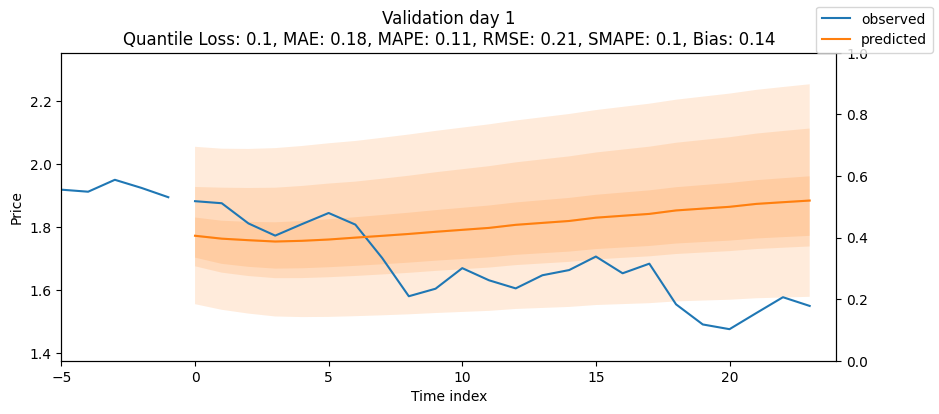

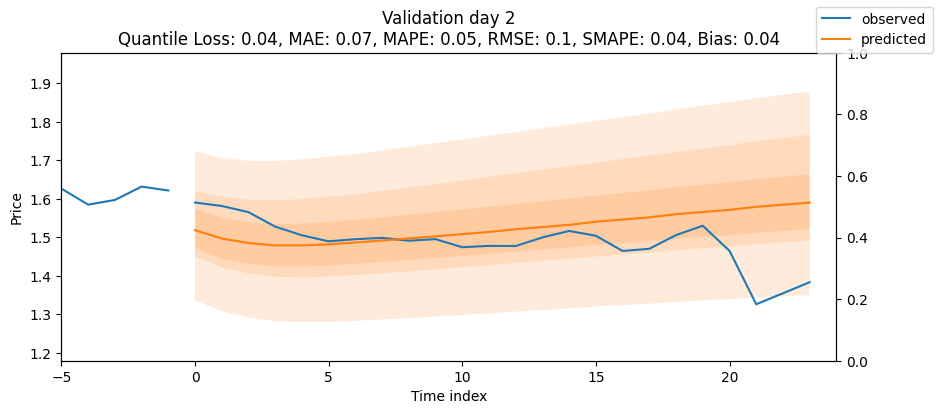

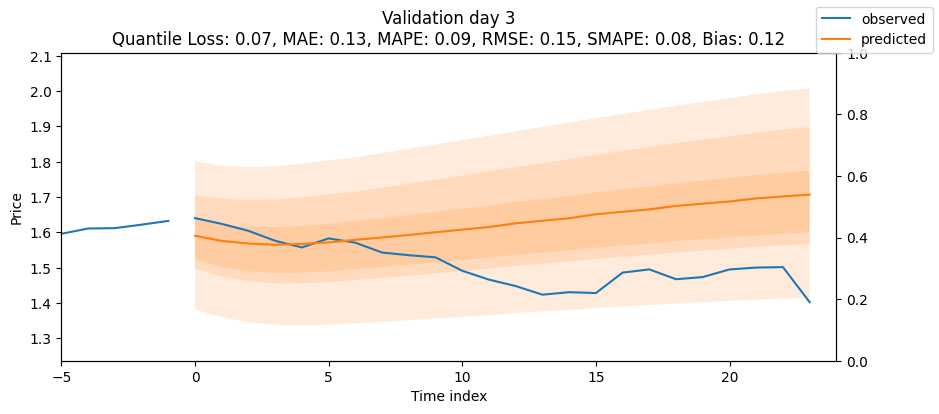

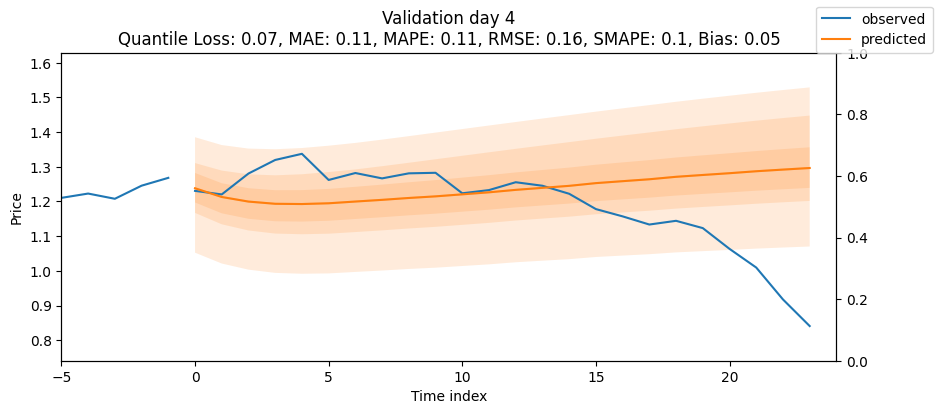

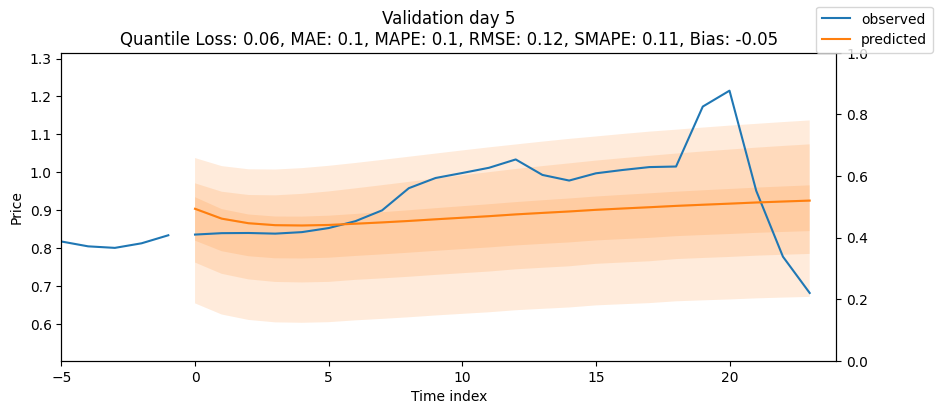

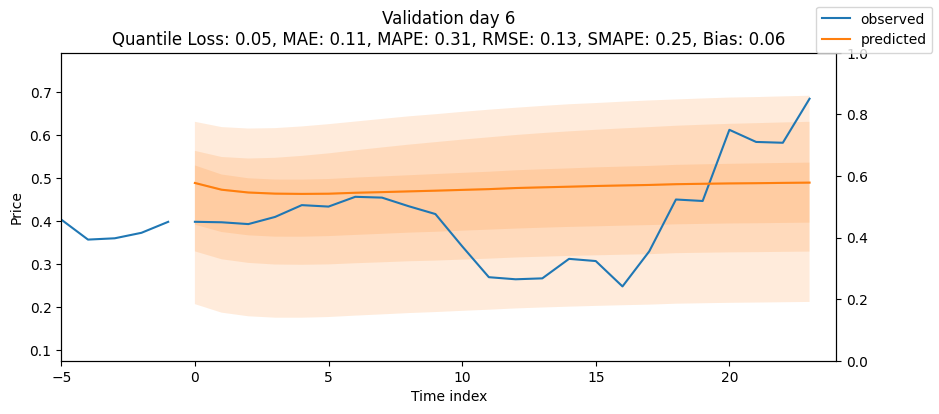

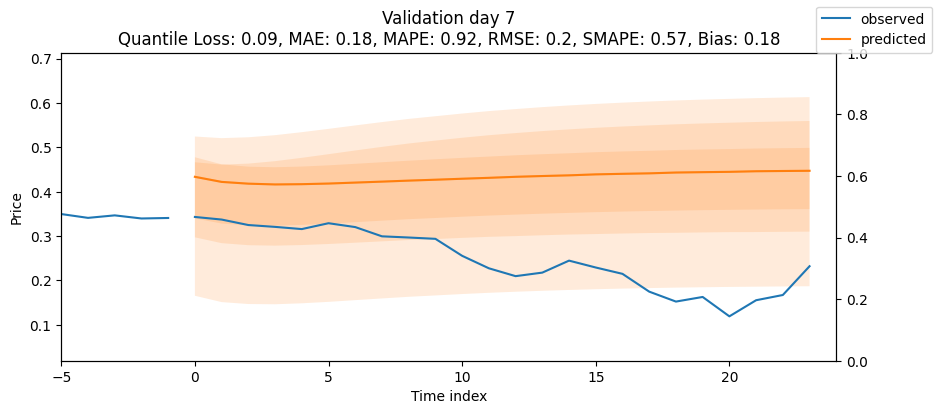

0.06832683033176831
mae: 0.12456893282277244
mape: 0.2395737101989133
rmse: 0.15260165078299387
SMAPE: 0.17825763512934958
Forecast Bias: 0.07670886921031135


In [20]:
total_average_loss = 0
mae_sum = 0
mape_sum = 0
rmse_sum = 0
smape_sum = 0
bias_sum = 0

for i, test_day in enumerate(test_dataloaders):
    raw_predictions, x = best_tft.predict(test_day, mode="raw", return_x=True)
    
    ### COMMENT OUT FOR UNSCALED ###
    #x['encoder_target'] = x['encoder_target'] * scale + center
    #x['decoder_target'] = x['decoder_target'] * scale + center
    #prediction_tensor = raw_predictions['prediction']
    #unscaled_prediction_tensor = prediction_tensor * scale + center
    #out = {"prediction": unscaled_prediction_tensor}
    ###
    
    ### COMMENT OUT FOR SCALED ####
    out = {"prediction": raw_predictions['prediction']}
    ###
    
    min_val = torch.minimum(torch.min(out['prediction'][:, :, 0]), x['decoder_target'].min())
    max_val = torch.maximum(torch.max(out['prediction'][:, :, -1]), x['decoder_target'].max())

    # create two y-axes, one on the left and one on the right
    fig, ax_left = plt.subplots(figsize=(10, 4))
    ax_right = ax_left.twinx()
    
    # plot the data on the left axis
    best_tft.plot_prediction(x, out, idx=0, plot_attention=False, add_loss_to_title=False, ax=ax_left)

    # plot additional data on the right axis
    ax_left.set_ylabel("Price")
    
    # set the limits for the left y-axis to zoom in
    plt.xlim(-5, 24)
    ax_left.set_ylim([min_val - 0.1, max_val + 0.1])
    
    Quantile_loss = QuantileLoss()
    loss_value = Quantile_loss(out['prediction'], x['decoder_target'])
    
    mae = np.mean(np.abs(np.array(out['prediction'][0,:,3]) - np.array(x['decoder_target'])))
    mape = np.mean(np.abs((np.array(out['prediction'][0,:,3]) - np.array(x['decoder_target'])) / np.array(x['decoder_target'])))
    rmse = np.sqrt(np.mean(np.square(np.array(out['prediction'][0,:,3]) - np.array(x['decoder_target']))))
    smape = np.mean(2 * np.abs(np.array(out['prediction'][0,:,3]) - np.array(x['decoder_target'])) / (np.abs(np.array(out['prediction'][0,:,3])) + np.abs(np.array(x['decoder_target']))))
    bias = np.mean(np.array(out['prediction'][0,:,3]) - np.array(x['decoder_target']))
    mae_sum += mae
    mape_sum += mape
    rmse_sum += rmse
    smape_sum += smape
    bias_sum += bias
    
    title = 'Validation day ' + str(i+1) + "\nQuantile Loss: " + str(round(loss_value.item(), 2)) + ", MAE: " + str(round(mae, 2)) + ", MAPE: " + str(round(mape, 2)) + ", RMSE: " + str(round(rmse, 2)) + ", SMAPE: " + str(round(smape, 2)) + ", Bias: " + str(round(bias,2))
    plt.title(title)
    
    total_average_loss = total_average_loss + loss_value.item()
    # show the plot
    plt.show()
    
print(total_average_loss/7)
mae_avg = mae_sum / 7
mape_avg = mape_sum / 7
rmse_avg = rmse_sum / 7
smape_avg = smape_sum / 7
bias_avg = bias_sum / 7

print(f'mae: {mae_avg}')
print(f'mape: {mape_avg}')
print(f'rmse: {rmse_avg}')
print(f'SMAPE: {smape_avg}')
print(f'Forecast Bias: {bias_avg}')

/usr/local/lib/python3.10/dist-packages/pytorch_forecasting/models/temporal_fusion_transformer/__init__.py:754: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


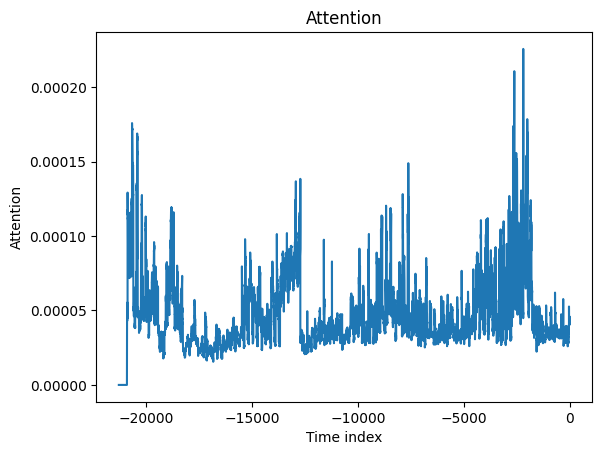

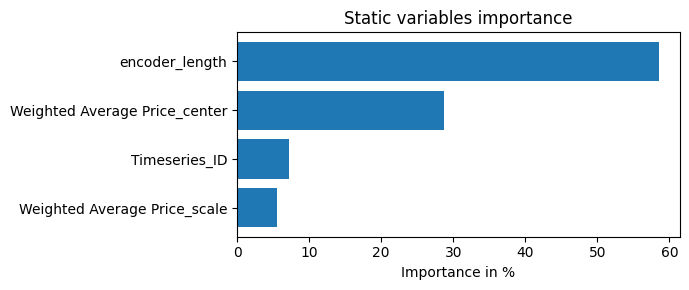

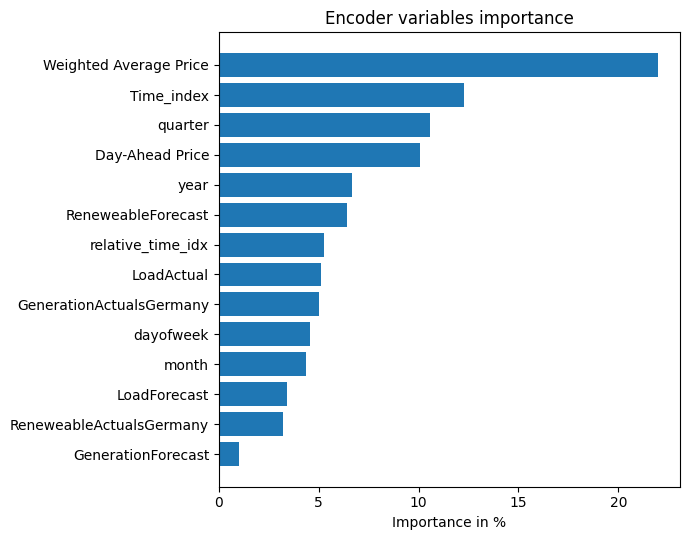

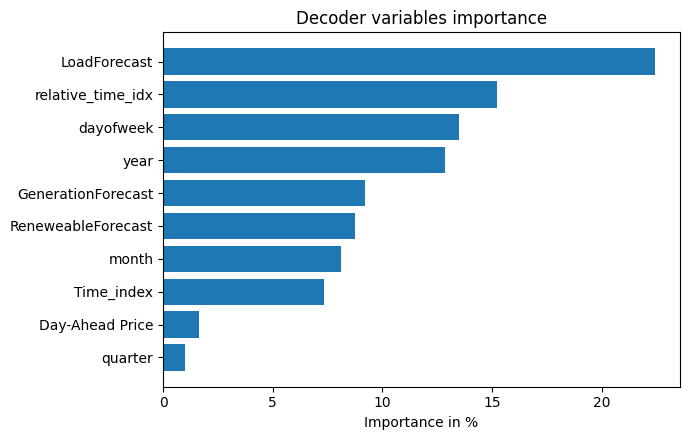

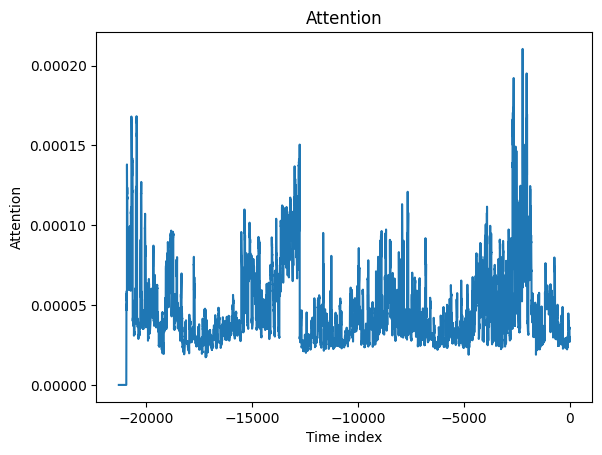

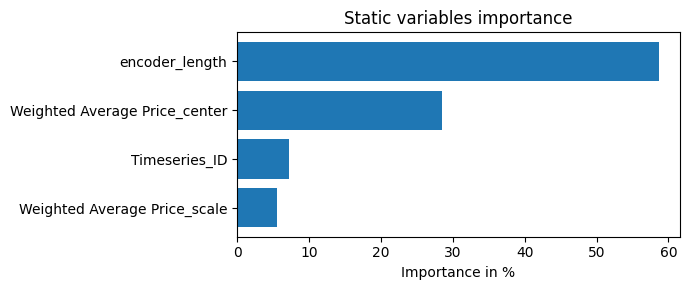

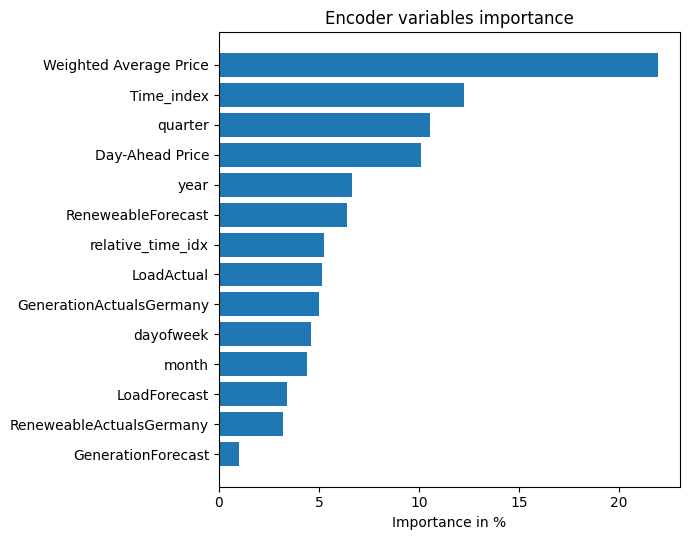

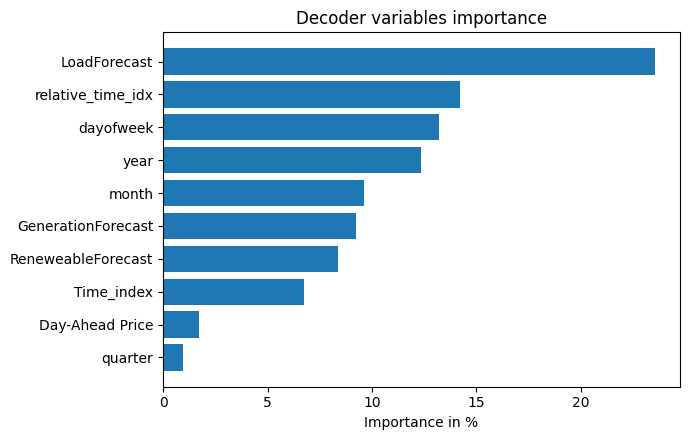

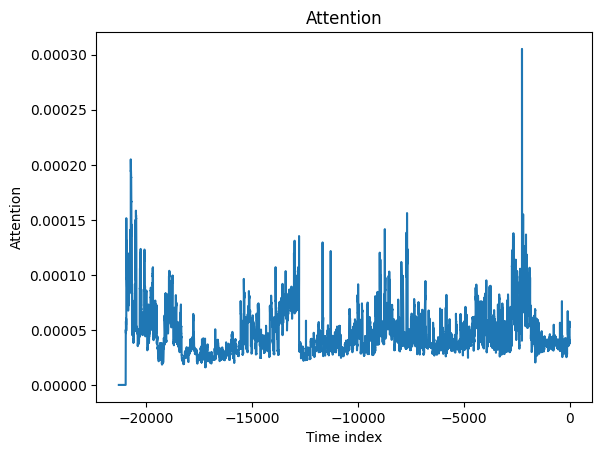

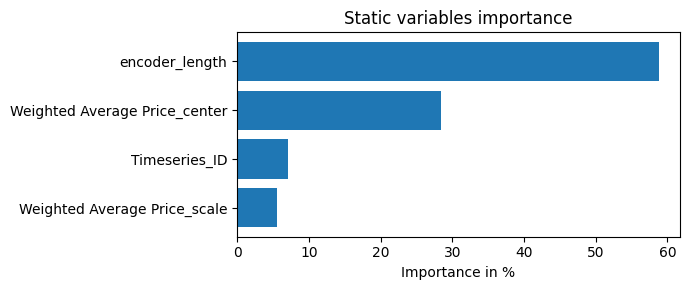

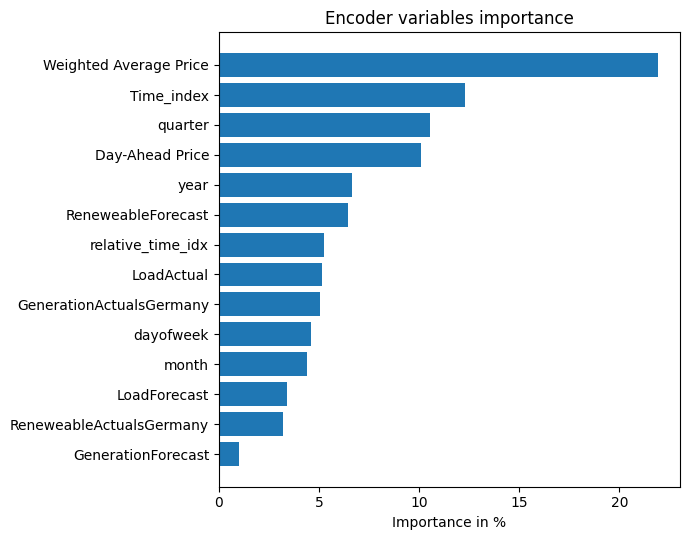

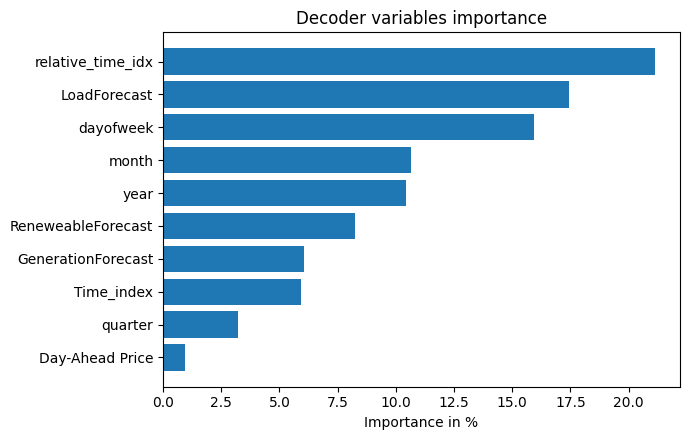

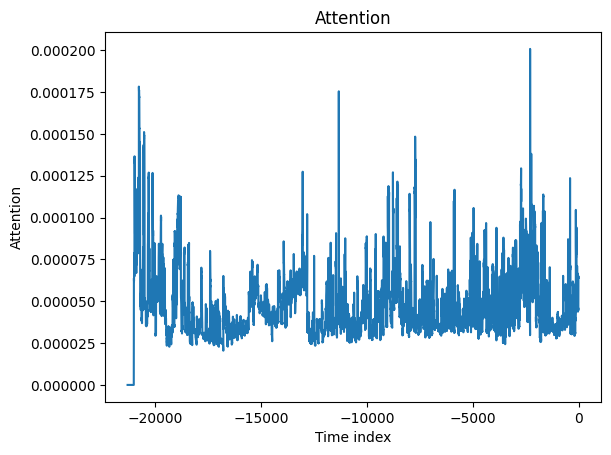

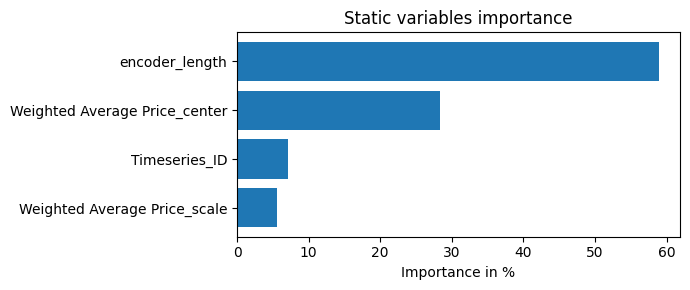

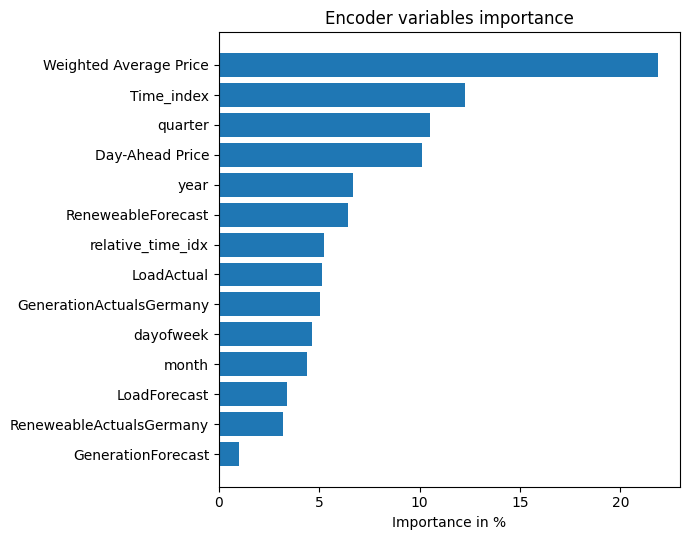

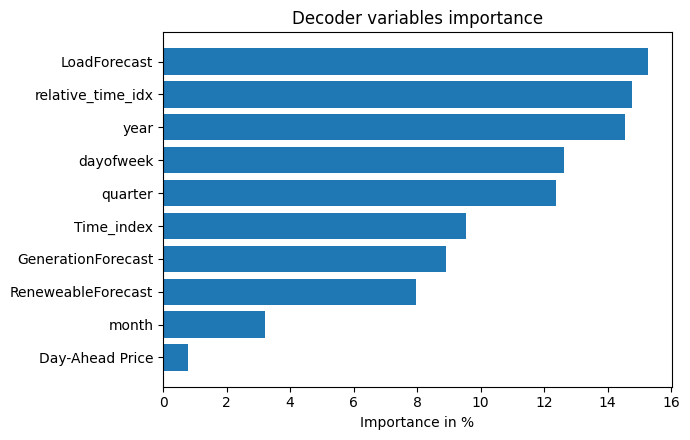

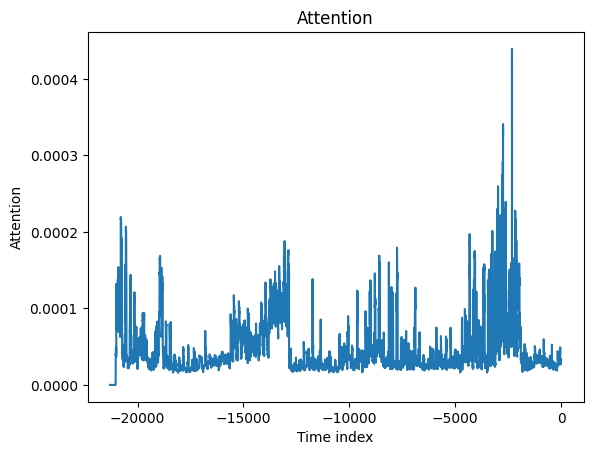

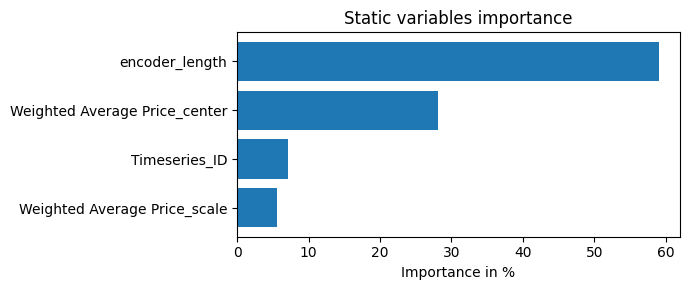

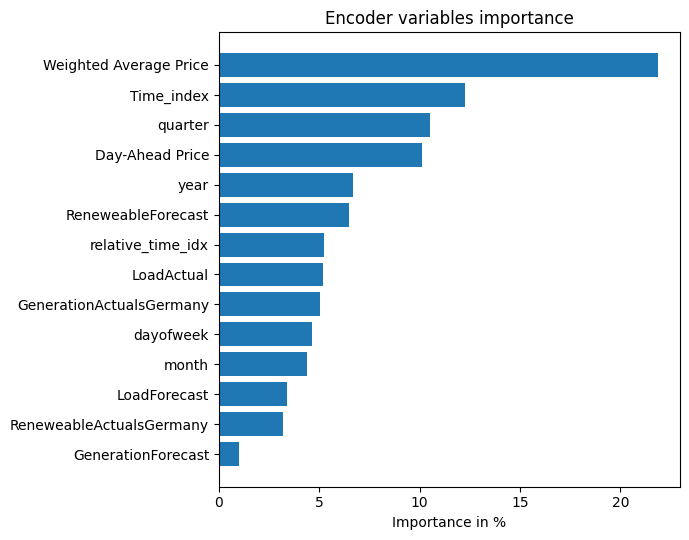

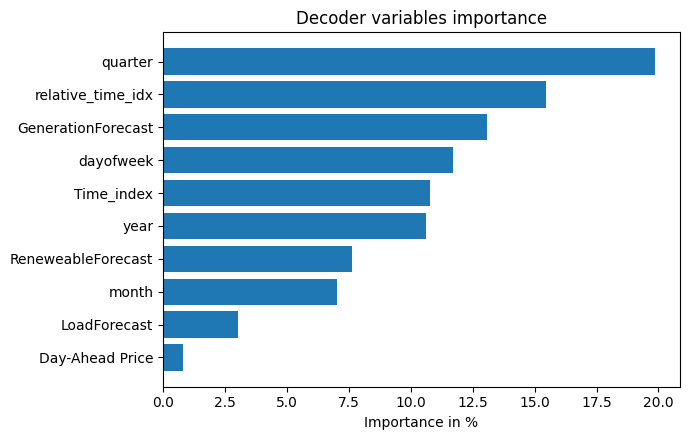

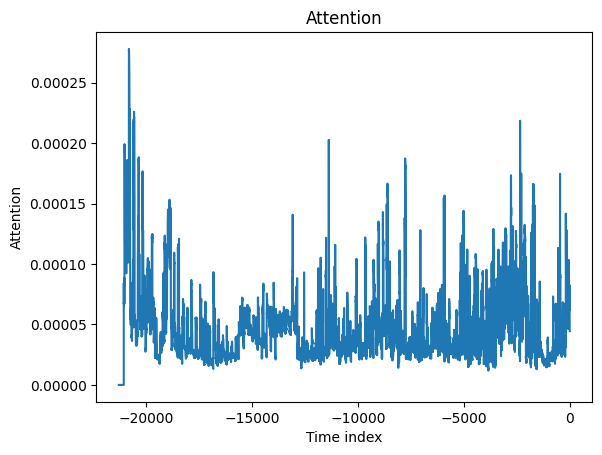

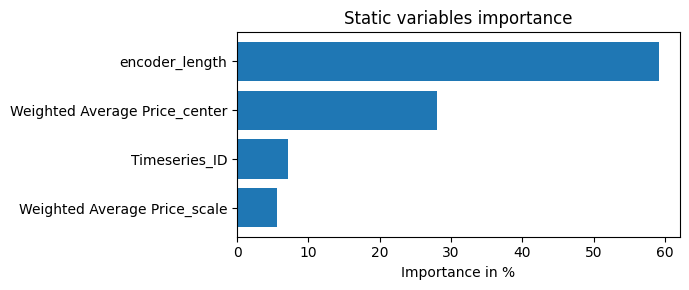

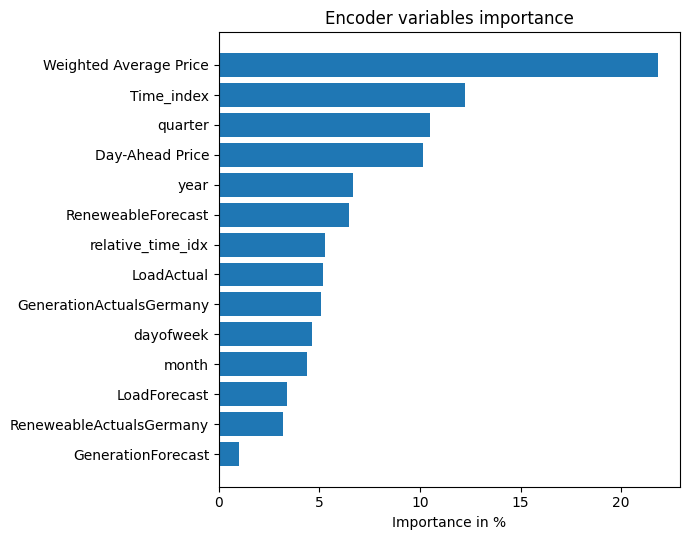

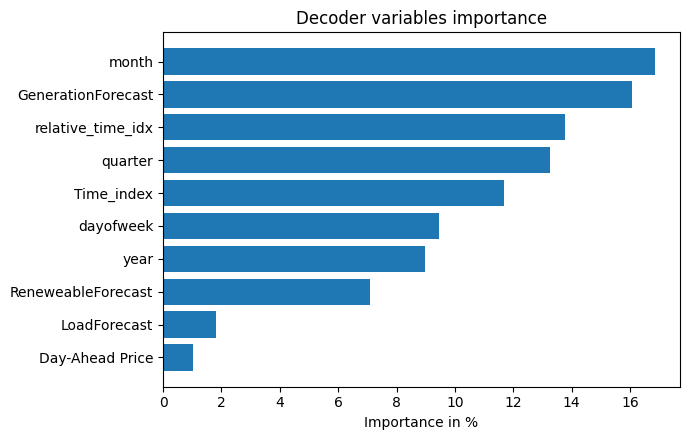

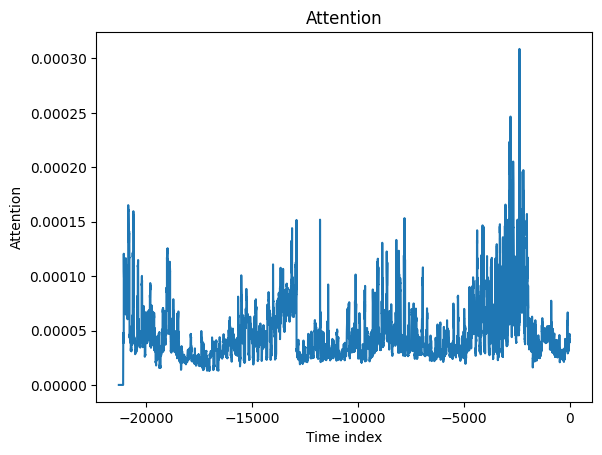

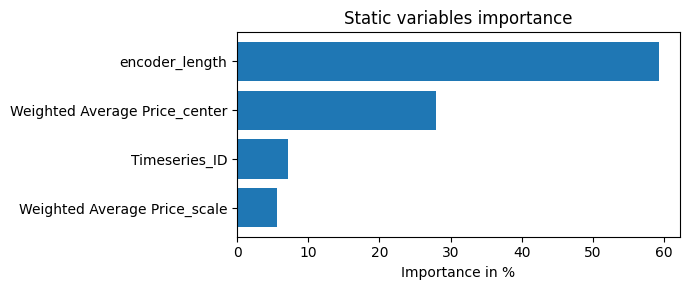

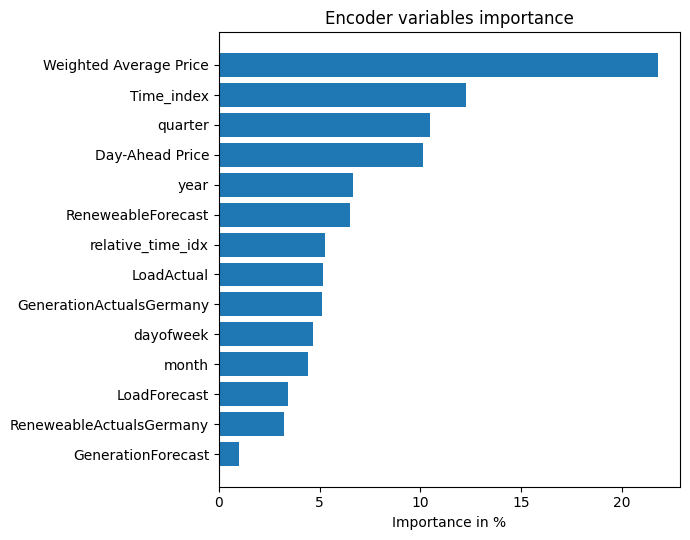

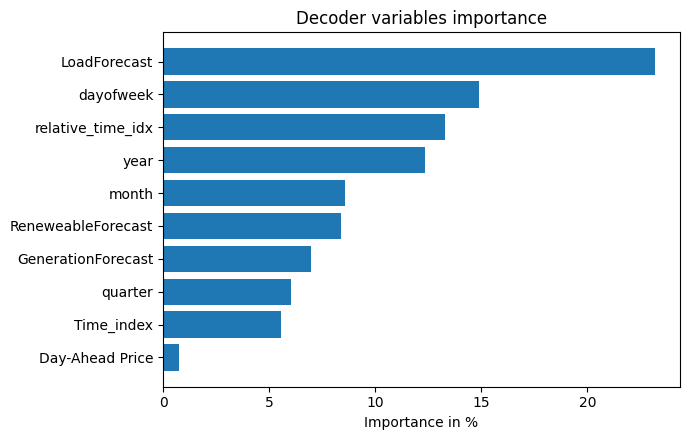

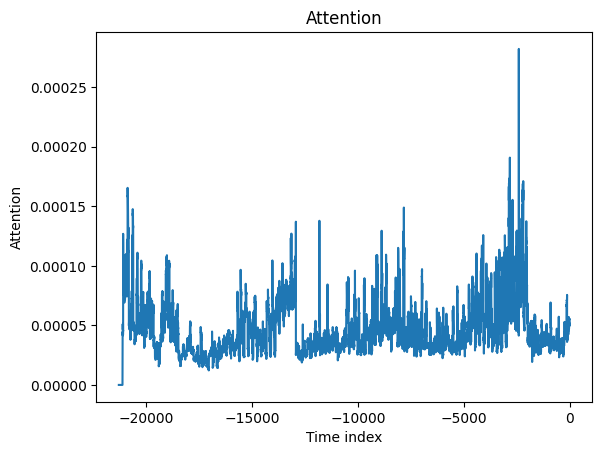

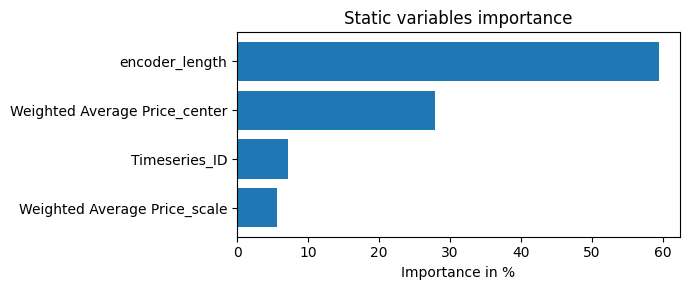

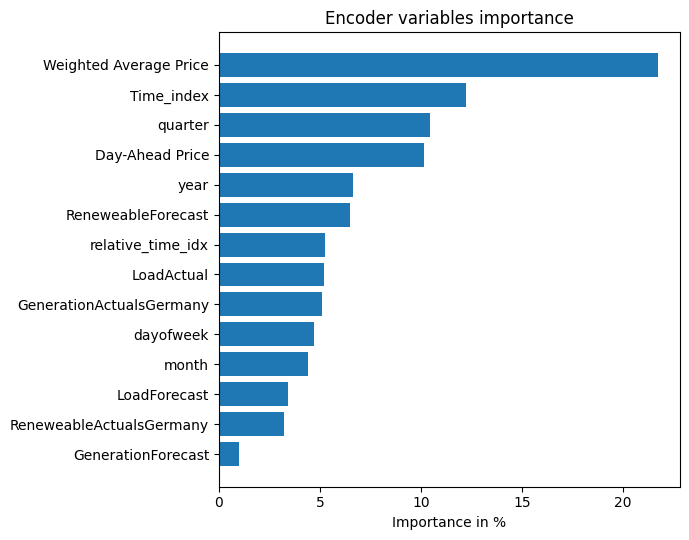

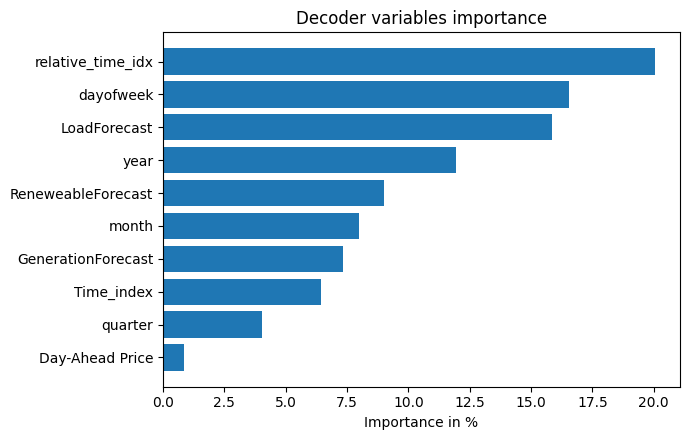

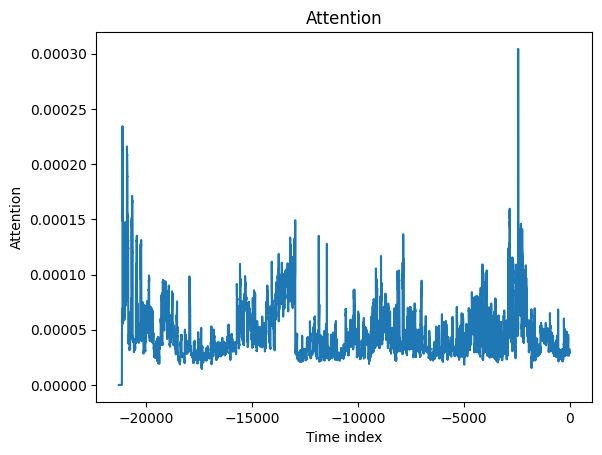

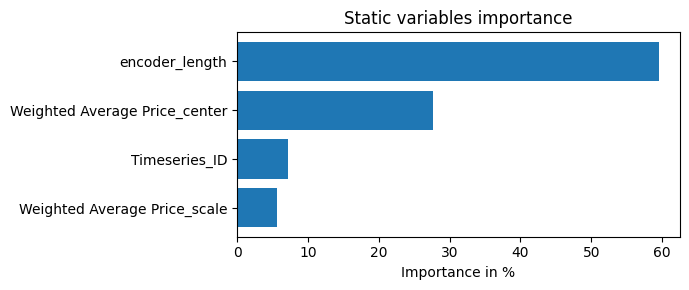

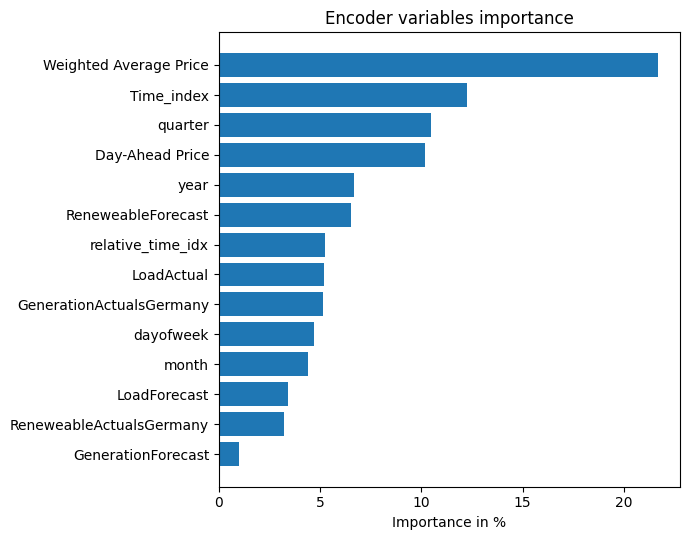

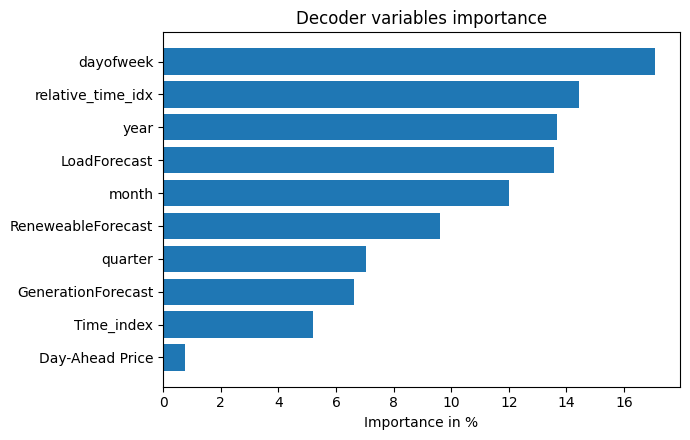

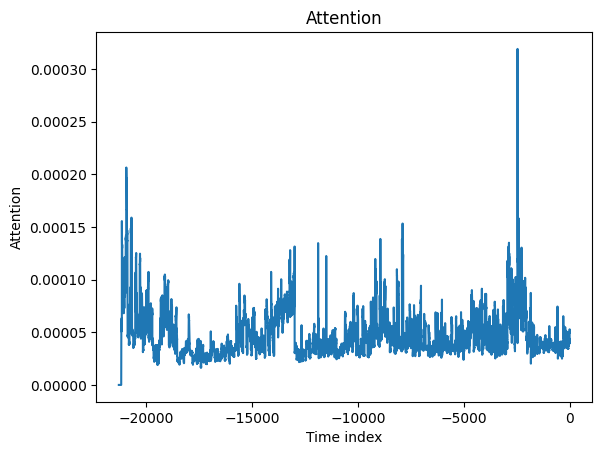

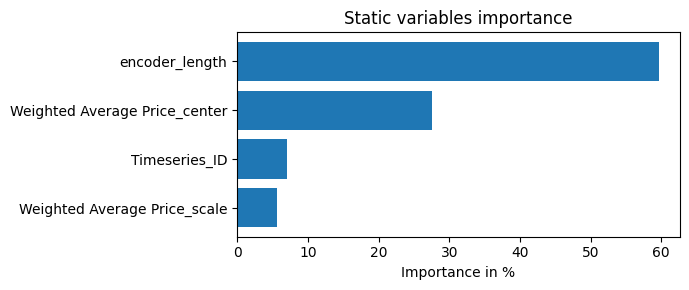

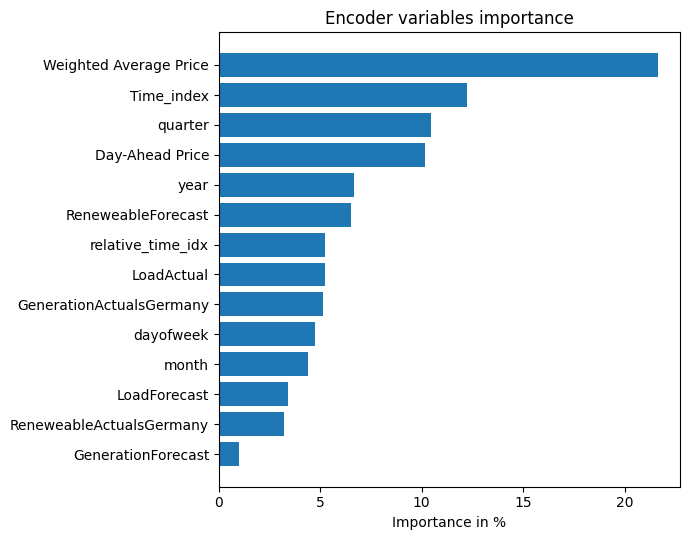

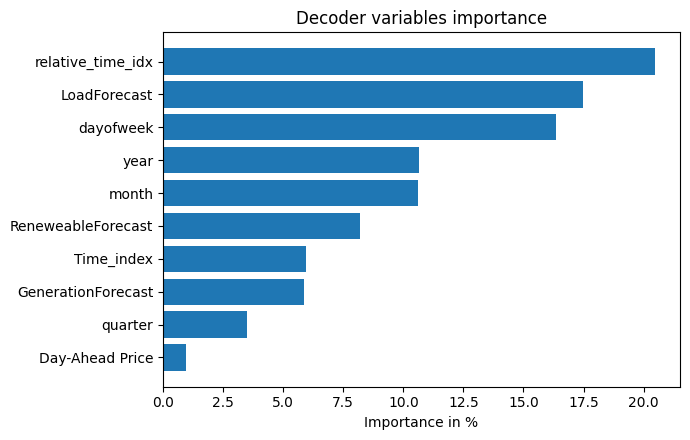

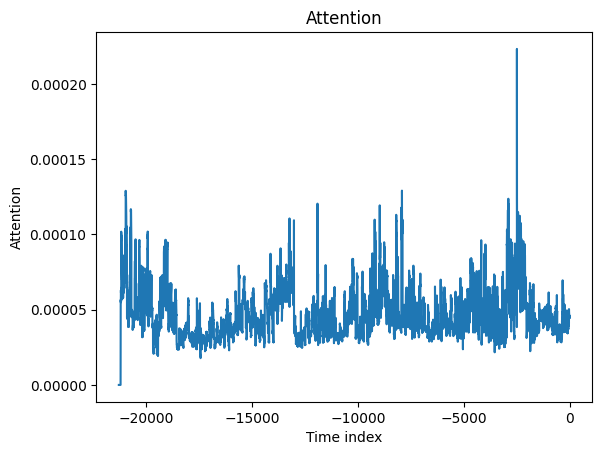

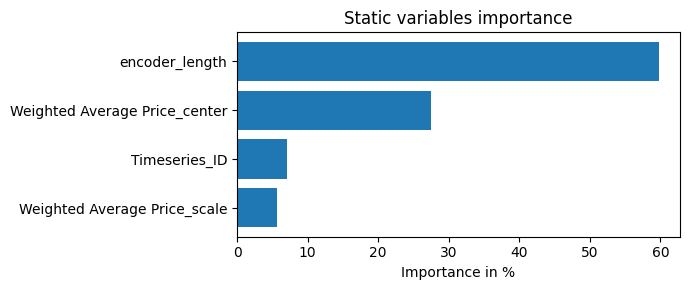

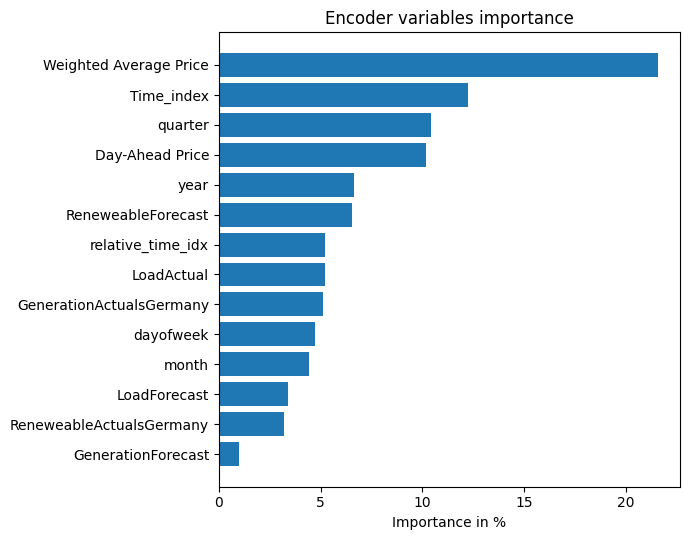

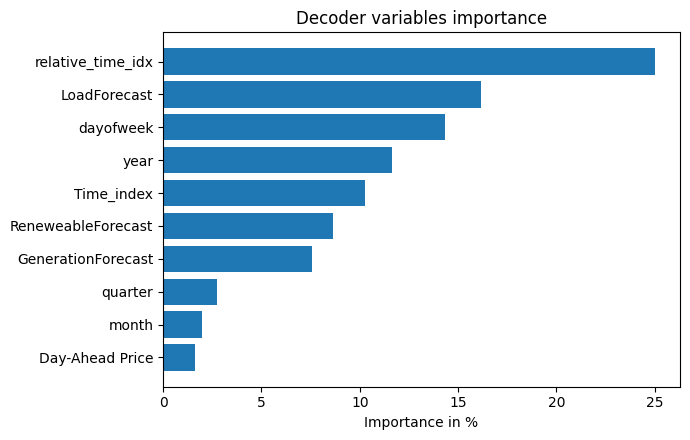

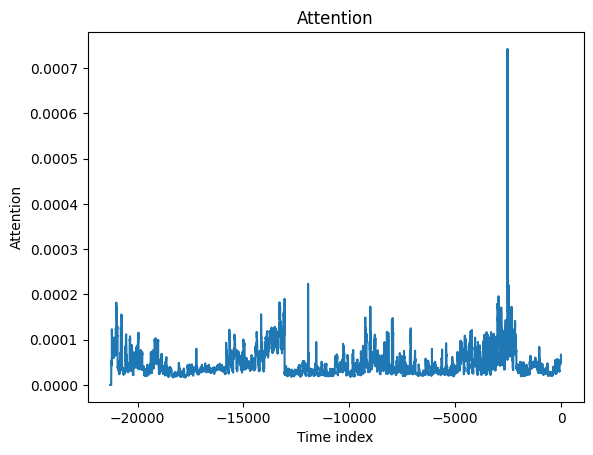

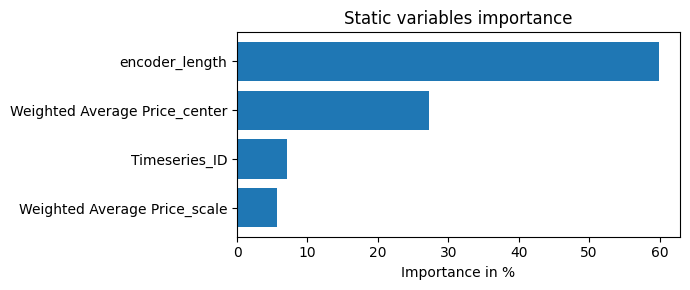

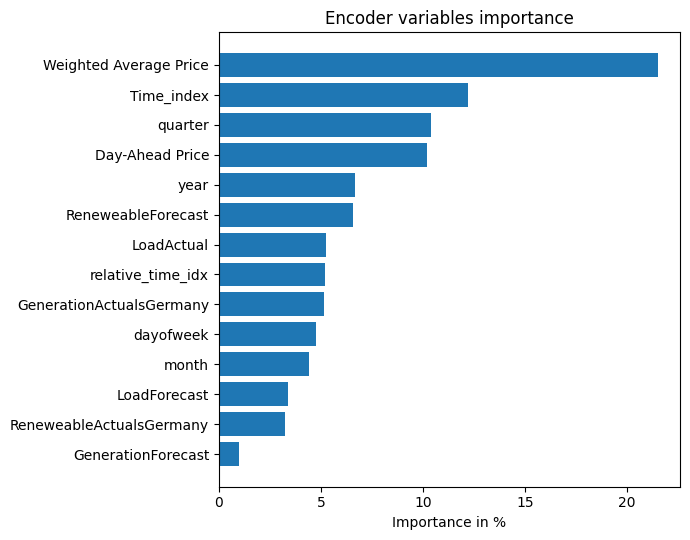

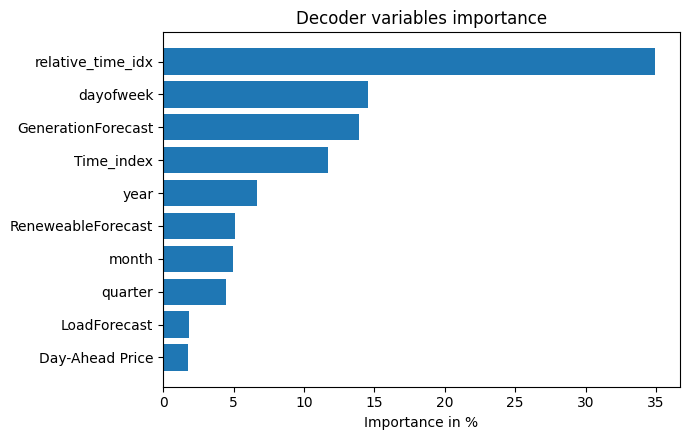

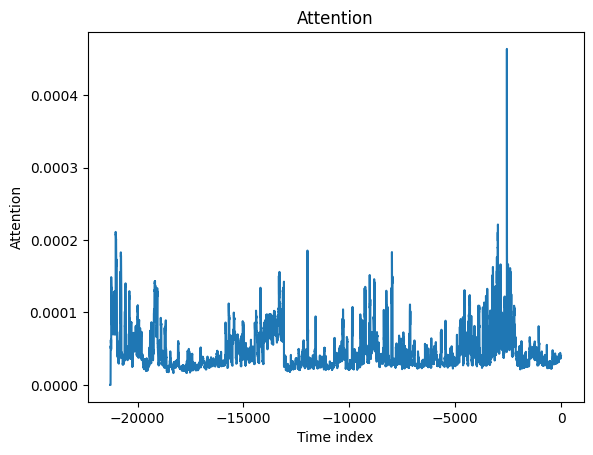

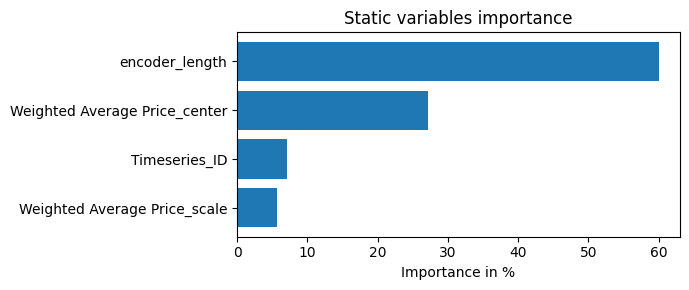

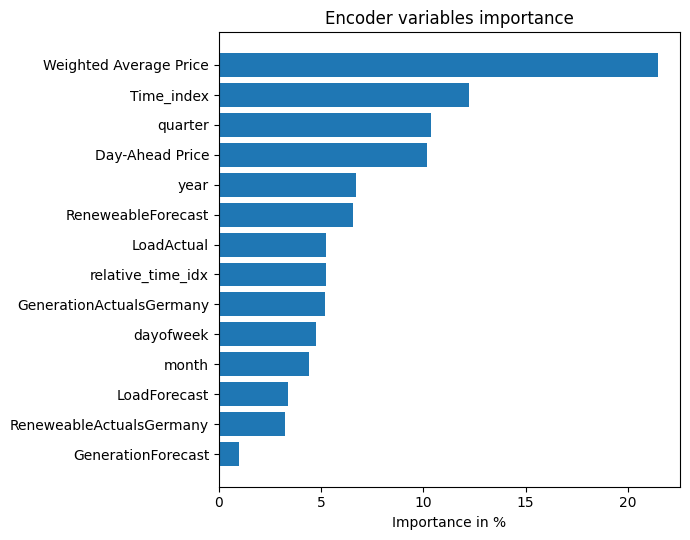

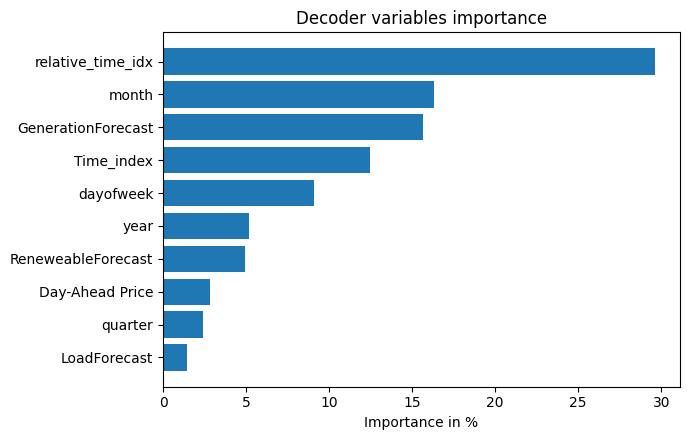

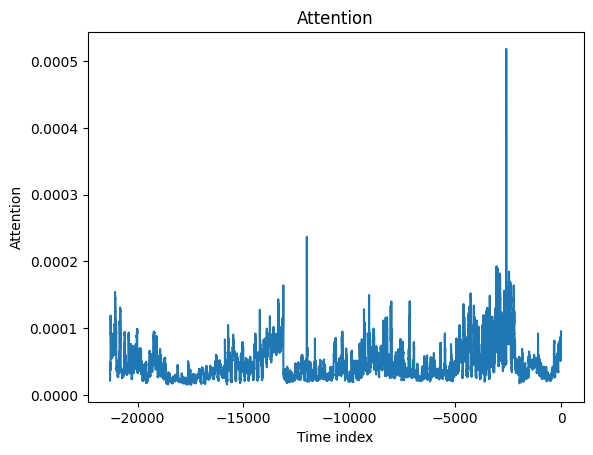

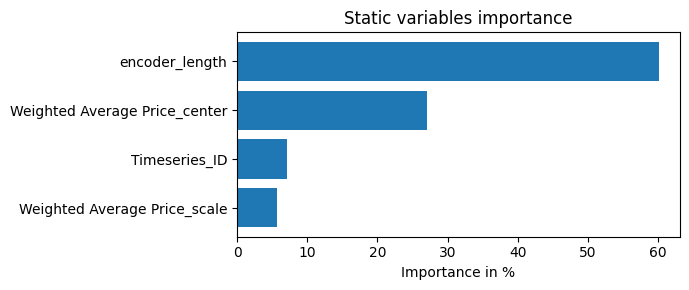

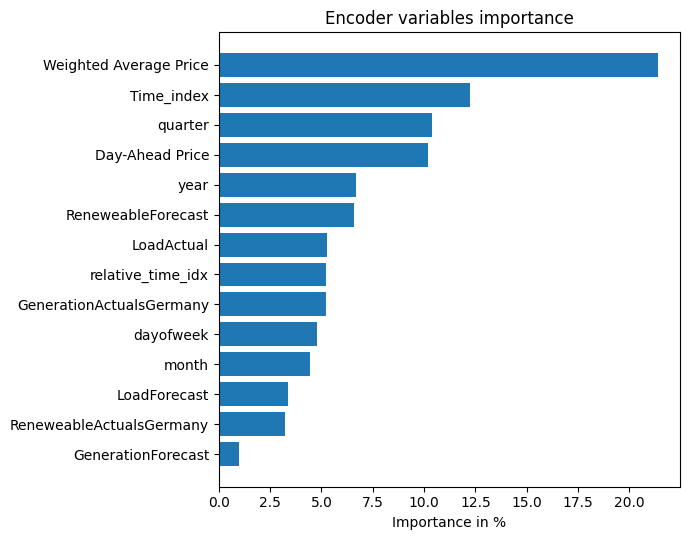

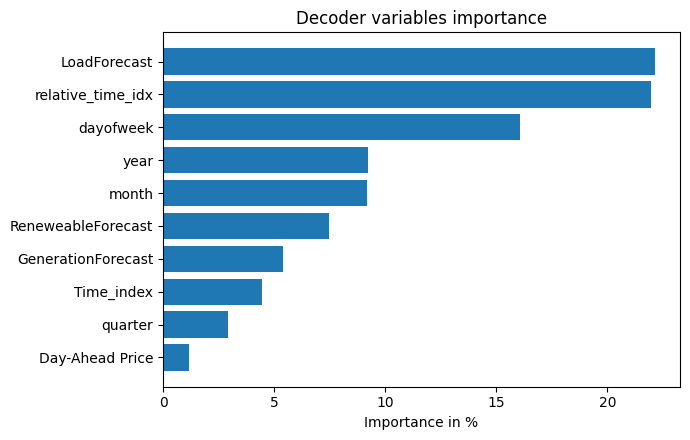

In [ ]:
#Variable interpretation

for i, validation_day in enumerate(val_dataloaders):
    raw_predictions, x = best_tft.predict(validation_day, mode="raw", return_x=True)
    interpretation = best_tft.interpret_output(raw_predictions, reduction="sum")
    best_tft.plot_interpretation(interpretation)